In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import linear_model
from scipy.optimize import minimize
from keras.datasets import mnist

rcParams.update({'font.size': 18})
(train_X, train_y), (test_X, test_y) = mnist.load_data()

a)

In [4]:
A=np.zeros((np.square(train_X.shape[1]),train_X.shape[0]))
for i in range(train_X.shape[0]):
    A[:,i]=train_X[i].flatten()
U, S, VT = np.linalg.svd(A,full_matrices=0)
S=np.diag(S)

b)

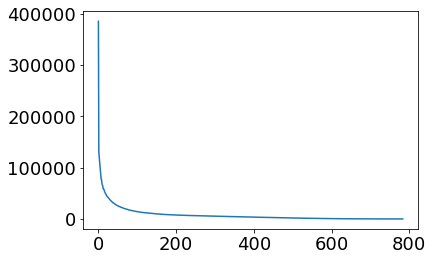

In [5]:
plt.plot(np.diag(S))

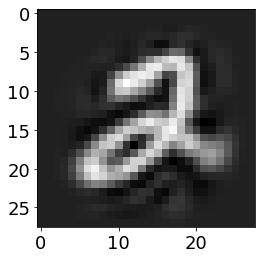

In [6]:
r=100
A_approx=U[:,:r] @ S[:r,:r] @ VT[:r,:]
image=np.reshape(A_approx[:,5],(28,28))
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

c) U is the eigendigits, sigma is the weightings, and V is the combination of eigendigits to go back to the data

d)

In [7]:
W=np.vstack((VT[:,1],VT[:,2],VT[:,4]))
P=np.matmul(W,A_approx)
P=np.vstack((P,train_y)).T
P.shape

(60000, 4)

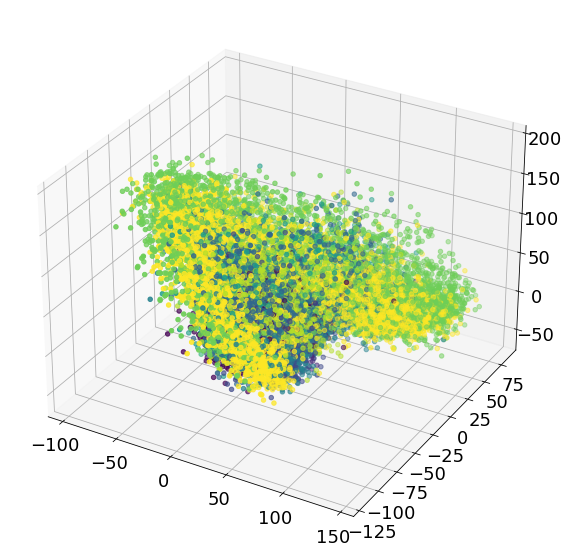

In [8]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
xdata=P[:,0]
ydata=P[:,1]
zdata=P[:,2]
scatter=ax.scatter3D(xdata, ydata, zdata, c=P[:,3])

e)

Text(0.5, 0.92, 'Separation between digit 0 and digit 1 in train data')

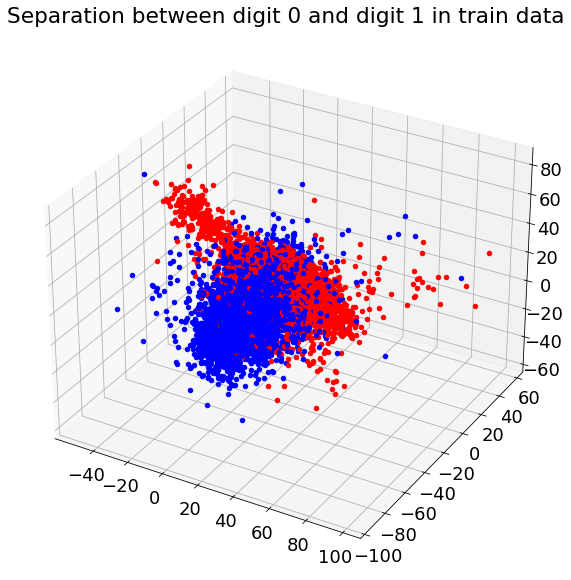

In [9]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

for i in range(P.shape[0]):
    if P[i,3]==0.0:
        ax.scatter3D(xdata[i], ydata[i], zdata[i], c='b')
    elif P[i,3]==1.0:
        ax.scatter3D(xdata[i], ydata[i], zdata[i], c='r')
ax.set_title('Separation between digit 0 and digit 1 in train data')

In [10]:
yes0=0
yes1=0
for i in range(P.shape[0]):
    if P[i,3]==0.0:
        if yes0==0:
            zero=P[i,:3]
            zero_label=P[i,3]
            yes0=1
        else:
            zero=np.vstack((zero,P[i,:3]))
            zero_label=np.vstack((zero_label,P[i,3]))
    if P[i,3]==1.0:
        if yes1==0:
            one=P[i,:3]
            one_label=P[i,3]
            yes1=1
        else:
            one=np.vstack((one,P[i,:3]))
            one_label=np.vstack((one_label,P[i,3]))

In [11]:
labels=np.vstack((zero_label,one_label))
xtrain=np.vstack((one,zero))

In [12]:
xtest=np.zeros((np.square(test_X.shape[1]),test_X.shape[0]))
for i in range(test_X.shape[0]):
    xtest[:,i]=test_X[i].flatten()
Utest, Stest, VTtest = np.linalg.svd(xtest,full_matrices=0)
Stest=np.diag(Stest)
xtest_approx=Utest[:,:r] @ Stest[:r,:r] @ VTtest[:r,:]
Wtest=np.vstack((VTtest[:,1],VTtest[:,2],VTtest[:,4]))
Ptest=np.matmul(Wtest,xtest_approx)
Ptest=np.vstack((Ptest,test_y)).T

Text(0.5, 0.92, 'Separation between digit 0 and digit 1 in test data')

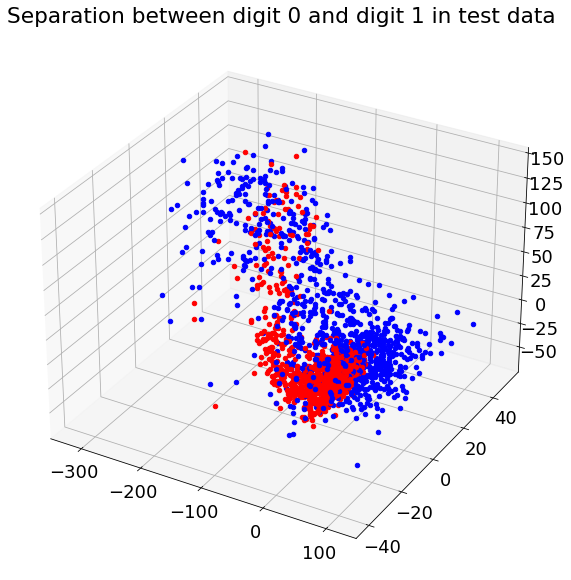

In [13]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

for i in range(Ptest.shape[0]):
    if Ptest[i,3]==0.0:
        ax.scatter3D(Ptest[i,0], Ptest[i,1], Ptest[i,2], c='b')
    elif Ptest[i,3]==1.0:
        ax.scatter3D(Ptest[i,0], Ptest[i,1], Ptest[i,2], c='r')
        
ax.set_title('Separation between digit 0 and digit 1 in test data')

In [14]:
yes0=0
yes1=0
for i in range(Ptest.shape[0]):
    if Ptest[i,3]==0.0:
        if yes0==0:
            zerotest=Ptest[i,:3]
            zerotest_label=Ptest[i,3]
            yes0=1
        else:
            zerotest=np.vstack((zerotest,Ptest[i,:3]))
            zerotest_label=np.vstack((zerotest_label,Ptest[i,3]))
    if Ptest[i,3]==1.0:
        if yes1==0:
            onetest=Ptest[i,:3]
            onetest_label=Ptest[i,3]
            yes1=1
        else:
            onetest=np.vstack((onetest,Ptest[i,:3]))
            onetest_label=np.vstack((onetest_label,Ptest[i,3]))
testlabels=np.vstack((zero_label,one_label))
testx=np.vstack((one,zero))

D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


75.75207264113699


Text(0.5, 1.0, 'Predicted Test Class')

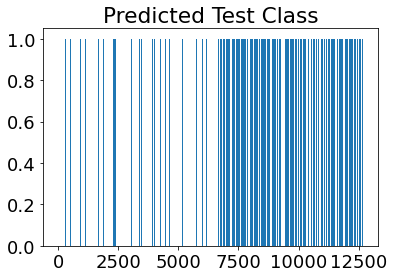

In [15]:
from scipy import io
import os
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
test_class = lda.fit(xtrain, labels).predict(testx)
E = 100*(1-np.sum(np.abs(test_class.reshape((test_class.shape[0],))-testlabels.reshape(testlabels.shape[0],)))/testlabels.shape[0])
print(E)
plt.bar(range(testlabels.shape[0]),test_class)
plt.title('Predicted Test Class')

Text(0.5, 1.0, 'True Test Class')

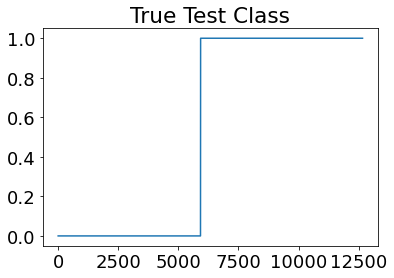

In [16]:
plt.plot(testlabels)
plt.title('True Test Class')

f)

Text(0.5, 0.92, 'Separation between digit 0, 1, and 2 in train data')

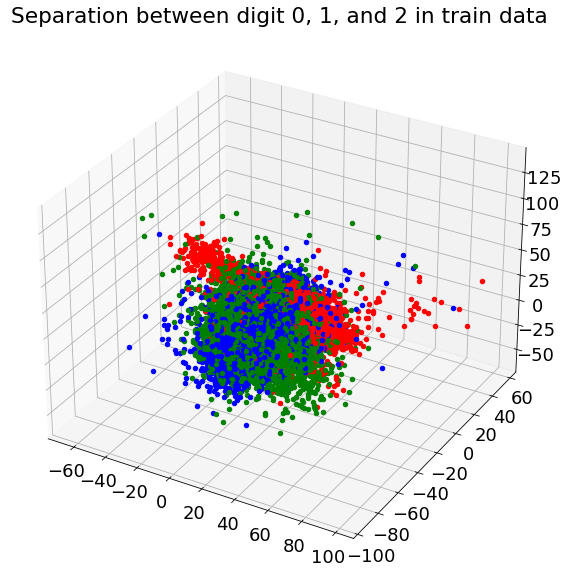

In [17]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

for i in range(P.shape[0]):
    if P[i,3]==0.0:
        ax.scatter3D(xdata[i], ydata[i], zdata[i], c='b')
    elif P[i,3]==1.0:
        ax.scatter3D(xdata[i], ydata[i], zdata[i], c='r')
    elif P[i,3]==2.0:
        ax.scatter3D(xdata[i], ydata[i], zdata[i], c='g')
ax.set_title('Separation between digit 0, 1, and 2 in train data')

Text(0.5, 0.92, 'Separation between digit 0, 1, and 2 in test data')

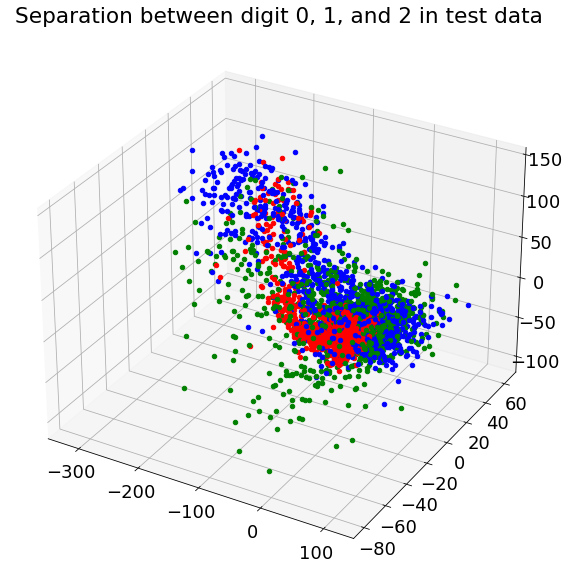

In [18]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

for i in range(Ptest.shape[0]):
    if Ptest[i,3]==0.0:
        ax.scatter3D(Ptest[i,0], Ptest[i,1], Ptest[i,2], c='b')
    elif Ptest[i,3]==1.0:
        ax.scatter3D(Ptest[i,0], Ptest[i,1], Ptest[i,2], c='r')
    elif Ptest[i,3]==2.0:
        ax.scatter3D(Ptest[i,0], Ptest[i,1], Ptest[i,2], c='g')
        
ax.set_title('Separation between digit 0, 1, and 2 in test data')

In [19]:
yes2=0
for i in range(P.shape[0]):
    if P[i,3]==2.0:
        if yes2==0:
            two=P[i,:3]
            two_label=P[i,3]
            yes2=1
        else:
            two=np.vstack((two,P[i,:3]))
            two_label=np.vstack((two_label,P[i,3]))
two_labels=np.vstack((labels,two_label))
two_xtrain=np.vstack((xtrain,two))

In [20]:
yes2=0
for i in range(Ptest.shape[0]):
    if Ptest[i,3]==2.0:
        if yes2==0:
            twotest=Ptest[i,:3]
            twotest_label=Ptest[i,3]
            yes2=1
        else:
            twotest=np.vstack((twotest,Ptest[i,:3]))
            twotest_label=np.vstack((twotest_label,Ptest[i,3]))
twotest_labels=np.vstack((testlabels,twotest_label))
twotestx=np.vstack((testx,twotest))

D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


63.70008030955684


Text(0.5, 1.0, 'Predicted Test Class')

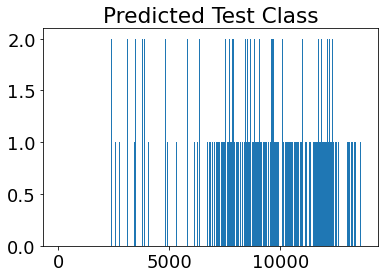

In [21]:
lda = LinearDiscriminantAnalysis()
twotest_class = lda.fit(two_xtrain, two_labels).predict(twotestx)
a=np.abs(twotest_class.reshape((twotest_class.shape[0],))-twotest_labels.reshape(twotest_labels.shape[0],))
n=0
for i in range(a.shape[0]):
    if a[i]==0:
        n=n+1
E=100*(n/twotest_labels.shape[0])
print(E)        
plt.bar(range(twotest_labels.shape[0]),twotest_class)
plt.title('Predicted Test Class')

Text(0.5, 1.0, 'True Test Class')

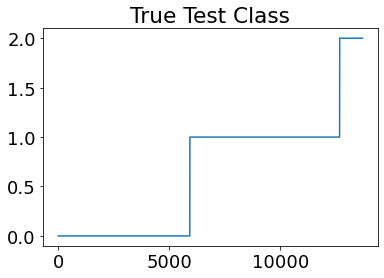

In [22]:
plt.plot(twotest_labels)
plt.title('True Test Class')

g)

In [42]:
E=np.zeros(36)
c=0
for n in range(1,10):
    for m in range(n+1,10):
        yes0=0
        yes1=0
        for i in range(P.shape[0]):
            if P[i,3]==n:
                if yes0==0:
                    zero=P[i,:3]
                    zero_label=P[i,3]
                    yes0=1
                else:
                    zero=np.vstack((zero,P[i,:3]))
                    zero_label=np.vstack((zero_label,P[i,3]))
            if P[i,3]==m:
                if yes1==0:
                    one=P[i,:3]
                    one_label=P[i,3]
                    yes1=1
                else:
                    one=np.vstack((one,P[i,:3]))
                    one_label=np.vstack((one_label,P[i,3])) 
        labels=np.vstack((zero_label,one_label))
        xtrain=np.vstack((one,zero))
        
        yes0=0
        yes1=0
        for i in range(Ptest.shape[0]):
            if Ptest[i,3]==n:
                if yes0==0:
                    zerotest=Ptest[i,:3]
                    zerotest_label=Ptest[i,3]
                    yes0=1
                else:
                    zerotest=np.vstack((zerotest,Ptest[i,:3]))
                    zerotest_label=np.vstack((zerotest_label,Ptest[i,3]))
            if Ptest[i,3]==m:
                if yes1==0:
                    onetest=Ptest[i,:3]
                    onetest_label=Ptest[i,3]
                    yes1=1
                else:
                    onetest=np.vstack((onetest,Ptest[i,:3]))
                    onetest_label=np.vstack((onetest_label,Ptest[i,3]))
        testlabels=np.vstack((zero_label,one_label))
        testx=np.vstack((one,zero))
        
        lda = LinearDiscriminantAnalysis()
        test_class = lda.fit(xtrain, labels).predict(testx)
        
        a=np.abs(test_class.reshape((test_class.shape[0],))-testlabels.reshape(testlabels.shape[0],))
        count=0
        for k in range(a.shape[0]):
            if a[k]==0:
                count=count+1
        E[c]=100*(count/testlabels.shape[0])
        
        print('Separating between ' + str(n) + ' and ' + str(m))
        print('% correct: ' + str(E[c]))
        c=c+1
        #plt.bar(range(test_class.shape[0]),test_class)
        #plt.title('Predicted Test Class')
        #plt.show()

D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 1 and 2
% correct: 71.10236220472441


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 1 and 3
% correct: 70.55076516740465


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 1 and 4
% correct: 48.04513668150032


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 1 and 5
% correct: 58.59574118227411


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 1 and 6
% correct: 79.32859399684045


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 1 and 7
% correct: 78.4654416852464


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 1 and 8
% correct: 68.05368061621536


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 1 and 9
% correct: 79.63123473327555


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 2 and 3
% correct: 59.06195715112913


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 2 and 4
% correct: 67.29661016949152


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 2 and 5
% correct: 60.55013621583619


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 2 and 6
% correct: 63.38834624452677


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 2 and 7
% correct: 80.6921377730508


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 2 and 8
% correct: 61.283766618680666


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 2 and 9
% correct: 81.98538674729151


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 3 and 4
% correct: 66.10707425039672


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 3 and 5
% correct: 61.51315789473685


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 3 and 6
% correct: 69.74022740476387


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 3 and 7
% correct: 78.10584059373991


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 3 and 8
% correct: 51.76097479552663


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 3 and 9
% correct: 74.2135761589404


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 4 and 5
% correct: 62.07937494450857


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 4 and 6
% correct: 73.80102040816327


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 4 and 7
% correct: 72.51177005038407


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 4 and 8
% correct: 66.02240656803215


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 4 and 9
% correct: 75.59155287931473


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 5 and 6
% correct: 64.92636034923714


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 5 and 7
% correct: 73.57521820982372


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 5 and 8
% correct: 62.429027679205106


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 5 and 9
% correct: 76.23570800351803


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 6 and 7
% correct: 83.55084954444717


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 6 and 8
% correct: 71.97722831166624


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 6 and 9
% correct: 84.78975309682313


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 7 and 8
% correct: 75.90789039286894


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Separating between 7 and 9
% correct: 58.310135909611915
Separating between 8 and 9
% correct: 74.20338983050847


D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


most difficult to separate: 1 & 4

h) easiest to separate: 6 & 9

i)

In [35]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='auto').fit(P[:,:3], P[:,3])
svm_test_class=clf.predict(Ptest[:,:3])

In [36]:
a=np.abs(svm_test_class-Ptest[:,3])
count=0
for k in range(a.shape[0]):
    if a[k]==0:
        count=count+1
E=100*(count/Ptest[:,3].shape[0])
print('% correct using SVM: ' + str(E))

% correct using SVM: 8.57


j)

In [30]:
n=1.0
m=4.0
yes0=0
yes1=0
for i in range(P.shape[0]):
    if P[i,3]==n:
        if yes0==0:
            zero=P[i,:3]
            zero_label=P[i,3]
            yes0=1
        else:
            zero=np.vstack((zero,P[i,:3]))
            zero_label=np.vstack((zero_label,P[i,3]))
    elif P[i,3]==m:
        if yes1==0:
            one=P[i,:3]
            one_label=P[i,3]
            yes1=1
        else:
            one=np.vstack((one,P[i,:3]))
            one_label=np.vstack((one_label,P[i,3])) 
labels=np.vstack((zero_label,one_label))
xtrain=np.vstack((one,zero))

yes0=0
yes1=0
for i in range(Ptest.shape[0]):
    if Ptest[i,3]==n:
        if yes0==0:
            zerotest=Ptest[i,:3]
            zerotest_label=Ptest[i,3]
            yes0=1
        else:
            zerotest=np.vstack((zerotest,Ptest[i,:3]))
            zerotest_label=np.vstack((zerotest_label,Ptest[i,3]))
    elif Ptest[i,3]==m:
        if yes1==0:
            onetest=Ptest[i,:3]
            onetest_label=Ptest[i,3]
            yes1=1
        else:
            onetest=np.vstack((onetest,Ptest[i,:3]))
            onetest_label=np.vstack((onetest_label,Ptest[i,3]))
testlabels=np.vstack((zero_label,one_label))
testx=np.vstack((one,zero))

In [31]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='auto').fit(xtrain, labels)
svm_test_class=clf.predict(testx)

D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [34]:
a=np.abs(svm_test_class-testlabels.reshape(testlabels.shape[0],))
count=0
for k in range(a.shape[0]):
    if a[k]==0:
        count=count+1
E=100*(count/testlabels.shape[0])
print('% correct using SVM: ' +str(E))
print('% correct using LDA: 48.04513668150032')

% correct using SVM: 88.36617927527018
% correct using LDA: 48.04513668150032
